In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random
!pip install np_utils
np.random.seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=274707bf042215e176c1d826f40bed13c0e5d7a6ed8dc2b9553c8d798ce82da3
  Stored in directory: /root/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
60000


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

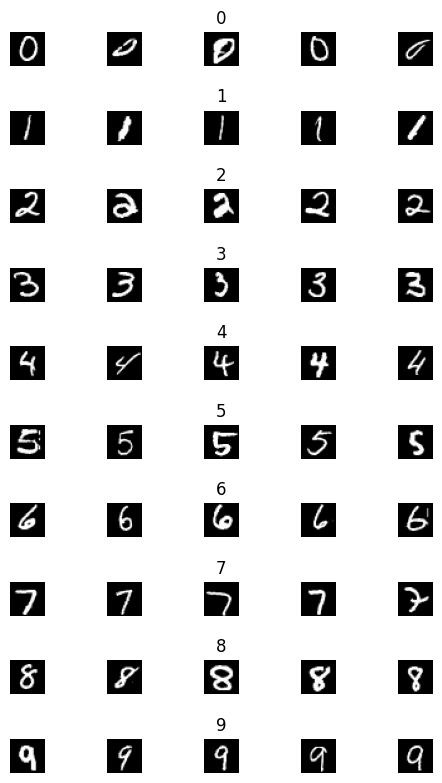

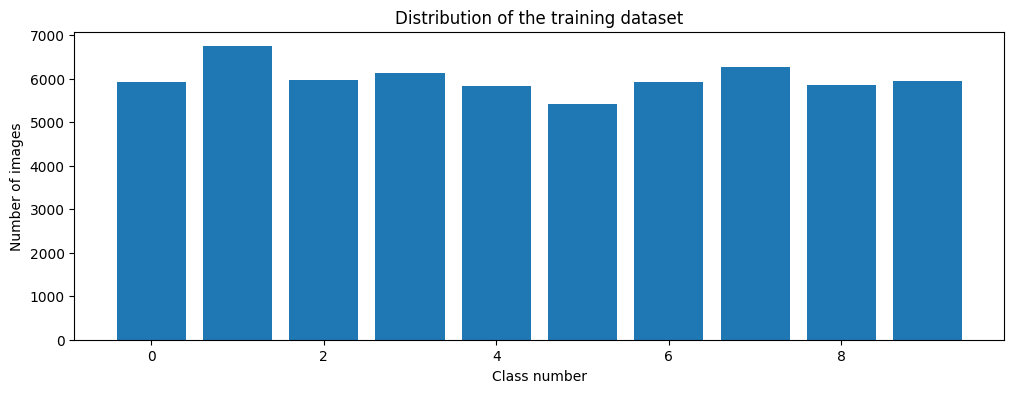

In [ ]:
num_of_samples=[]
cols=5
num_classes=10

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,8))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],
                     cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      # The following line was moved outside the inner loop
      # num_of_samples.append(len(x_selected))

# Moved outside the inner loop to ensure num_of_samples is fully populated
for j in range(num_classes):
    x_selected = X_train[y_train == j]
    num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)#10 categorize


In [ ]:
#value0-255 so val divide by 255 will be  0 or 1 to make data standarlzed
X_train=X_train/255
X_test=X_test/255

num_pixels=784
X_train=X_train.reshape(X_train.shape[0],num_pixels)
X_test=X_test.reshape(X_test.shape[0],num_pixels)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rates=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model=create_model()
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None
